In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline


In [14]:
## to load the data using SQL 
# conn = sqlite3.connect('data/sakila.db')
conn = sqlite3.connect('C:/Users/s153132/Desktop/Data Science/Python/Data Wrangeling/sakila.db')
df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])
df.head()


,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [16]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB
None


,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [18]:
# What's the mean of film_rental_duration?
df['film_rental_duration'].mean()

4.935489902767389

<AxesSubplot:>

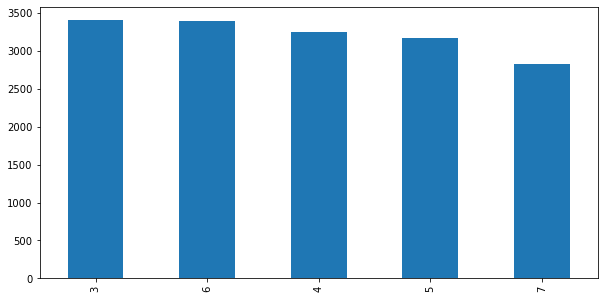

In [158]:
# What's the most common rental duration?
df["film_rental_duration"].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:ylabel='film_rental_rate'>

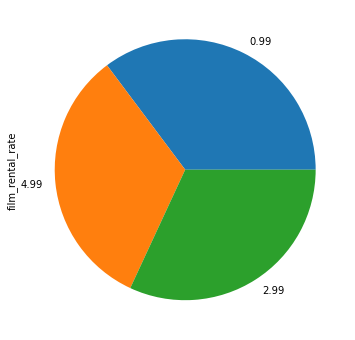

In [31]:
# What is the most common rental rate?
# Show a pie plot with all possible rental rates.
# Show a bar plot with all possible rental rates.
# Which plot you think fits the best in this case? Why?

df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(14,6))



<AxesSubplot:>

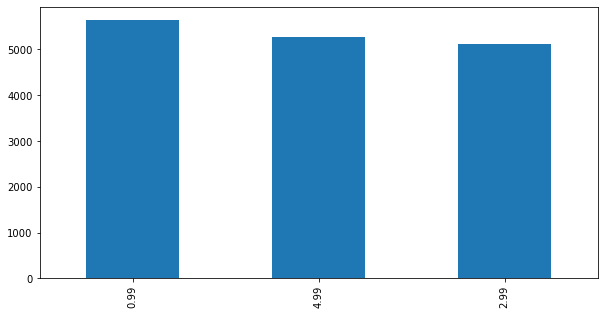

In [159]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

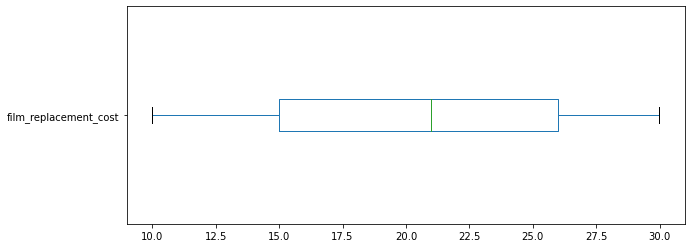

In [42]:
# How is the replacement cost distributed?
# Show a box plot of the replacement costs.
# Show a density plot of the replacement costs.
# Add a red line on the mean.
# Add a green line on the median median.

df['film_replacement_cost'].describe()
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(10,4))


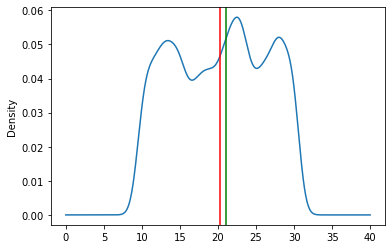

In [47]:
xx= df['film_replacement_cost'].plot(kind='density')
xx.axvline(df['film_replacement_cost'].mean(), color='red')
xx.axvline(df['film_replacement_cost'].median(), color='green')


PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64


<AxesSubplot:>

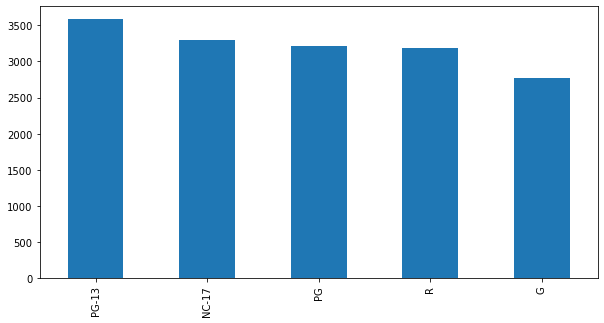

In [160]:
# How many films of each rating do we have?
# Show the raw count of each film rating.
# Show a bar plot with all possible film ratings.
print(df['film_rating'].value_counts())
df['film_rating'].value_counts().plot(kind='bar', figsize=(10,5))


In [ ]:
#  Does the film replacement cost vary depending on film rating?


<AxesSubplot:title={'center':'film_replacement_cost'}, xlabel='[film_rating]'>

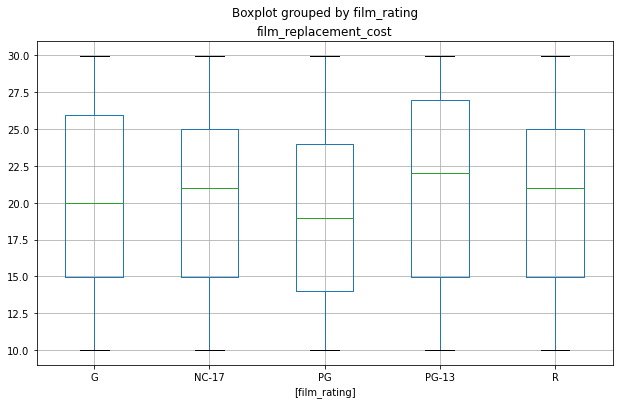

In [68]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(10,6))

In [81]:
# Add and calculate a new rental_days column
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
df['rental_days']

rental_id
1        1.0
2        3.0
3        7.0
4        9.0
5        8.0
        ... 
16045    2.0
16046    3.0
16047    1.0
16048    7.0
16049    6.0
Name: rental_days, Length: 16044, dtype: float64

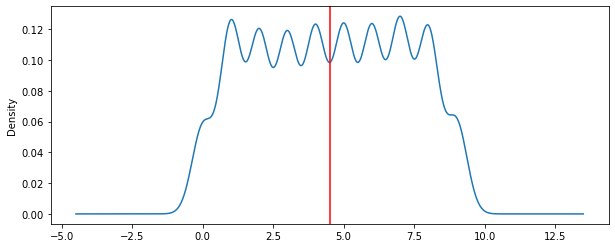

In [94]:
# # Analyze the distribution of rental_days
# Calculate the mean of rental_days.
# Show a density (KDE) of rental_days.
mean_val =df['rental_days'].mean()
xx= df['rental_days'].plot(kind='kde', figsize=(10,4))
xx.axvline(mean_val, color='red')

In [98]:
#  Add and calculate a new film_daily_rental_rate column
df['film_daily_rental_rate']= df['film_rental_rate']/df['film_rental_duration']
df['film_daily_rental_rate'].head()


rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

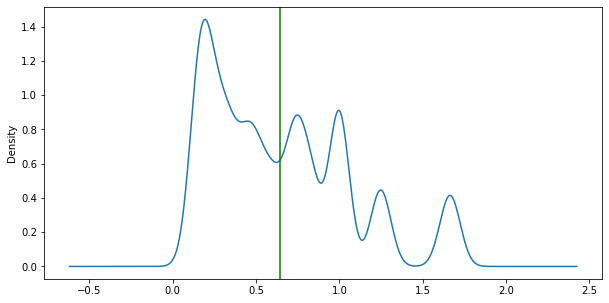

In [161]:
# Analyze the distribution of film_daily_rental_rate
xx= df['film_daily_rental_rate'].plot(kind='density', figsize=(10,5))
xx.axvline(df['film_daily_rental_rate'].mean(), color='green')

In [124]:
# List 10 films with the lowest daily rental rate
df.loc[df['film_daily_rental_rate']== df['film_daily_rental_rate'].min()].head(10)


,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.0,0.141429


In [125]:
# List 10 films with the highest daily rental rate
df.loc[df['film_daily_rental_rate']== df['film_daily_rental_rate'].max()].head(10)


,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,1.663333


In [129]:
# How many rentals were made in Lethbridge city?
df[df['rental_store_city']=='Lethbridge'].shape[0]

7923

<AxesSubplot:>

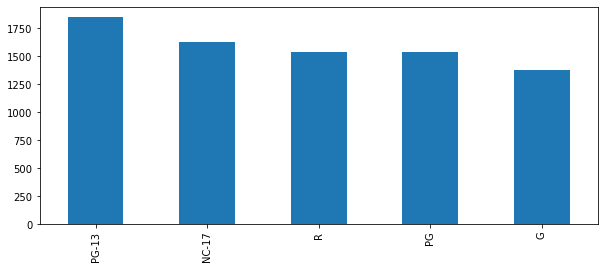

In [139]:
# How many rentals of each film rating were made in Lethbridge city?
df.loc[(df['rental_store_city']=='Lethbridge'), 'film_rating'].value_counts()

# Show a bar plot with each film rating count.
df.loc[(df['rental_store_city']=='Lethbridge'), 'film_rating'].value_counts().plot(kind='bar', figsize=(10,4))



In [151]:
# How many rentals were made in Woodridge city with rental duration higher than 5 days?
df.loc[(df['rental_store_city']== 'Woodridge') & (df['film_rental_duration']>5)].shape[0]

3186

In [156]:
# How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?
df.loc[(df['store_id']==2) | (df['film_replacement_cost']<10.99)].shape[0]

8444